## P5
Małgorzata Kurcjusz-Gzowska 

Do poprawy:
P.2 - do zaimplementowania; 
P.4 - do zaimplementowania; 
5.5 - dowód na kartce, że hypergeom (i dostałam już tutaj 1 pkt)

In [1]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools

from scipy.stats import hypergeom,binom, poisson

#### P5.1 Assuming the Poisson approximation, we calculate the variance... Complete the missing calculations [0.5P]

#### P5.2 Clustering coefficient <'C>=p. Check the analytical result by simlation. [1P]

In [4]:
# DO POPRAWY - ZAIMPLEMENTOWAĆ

# ER = n wierzchołków i każda możliwa krawędź między dwiema różnymi parami wierzchołków jest tworzona z prawdopodobieństwem p

def simulate_clustering(n=1000, p=0.05, repeats=50):
    values = []

    for _ in range(repeats):
        G = nx.erdos_renyi_graph(n, p) #generuje graf ER G(n,p) - ZAIMPLEMENTOWANE
        C = nx.average_clustering(G) # średni współczynnik klastrowania - ZAIMPLEMENTOWE
        values.append(C)

    return np.mean(values), np.std(values)

mean_C, std_C = simulate_clustering(n=1000, p=0.05, repeats=50)

print("Analytical p =", 0.05)
print("Simulated mean C =", mean_C)
print("Std deviation =", std_C)

Analytical p = 0.05
Simulated mean C = 0.05002168122803198
Std deviation = 0.00044946589096750314


In [12]:
## POPRAWA

# graf ER G(n, p)
def er_graph_manual(n, p, seed=None):
    rng = np.random.default_rng(seed)
    G = nx.Graph()
    G.add_nodes_from(range(n))

    # przechodzimy po wszystkich parach węzłów i z prawdopodobieństwem p dodajemy krawędź
    for i in range(n):
        for j in range(i + 1, n):
            if rng.random() < p:
                G.add_edge(i, j)
    return G


#  klasteryzacja
def node_clustering(G, v):
    neighbors = list(G.neighbors(v))
    k = len(neighbors)

    if k < 2:
        return 0.0

    # ile maksymalnie może być krawędzi między sąsiadami
    possible_edges = k * (k - 1) / 2

    # liczymy faktyczne krawędzie między sąsiadami
    existing_edges = 0
    for i in range(k):
        for j in range(i + 1, k):
            u = neighbors[i]
            w = neighbors[j]
            if G.has_edge(u, w):
                existing_edges += 1

    return existing_edges / possible_edges


def average_clustering_manual(G):
    n = G.number_of_nodes()
    return sum(node_clustering(G, v) for v in G.nodes()) / n



def simulate_clustering(n=1000, p=0.05, repeats=50):
    values = []

    for r in range(repeats):
        G = er_graph_manual(n, p, seed=r)      
        C = average_clustering_manual(G)       
        values.append(C)

    return np.mean(values), np.std(values)


mean_C, std_C = simulate_clustering(n=1000, p=0.05, repeats=50)

print("Analytical p =", 0.05)
print("Simulated mean C =", mean_C)
print("Std deviation =", std_C)

Analytical p = 0.05
Simulated mean C = 0.04997206889179411
Std deviation = 0.0005386649263279968


#### P5.3 ER model generalization... Generate and draw a graph consisting of 4 community each with N=20 nodes and the probability of connection within the community higher than between them. Draw the result. How it depends on the parameter values? [2P]

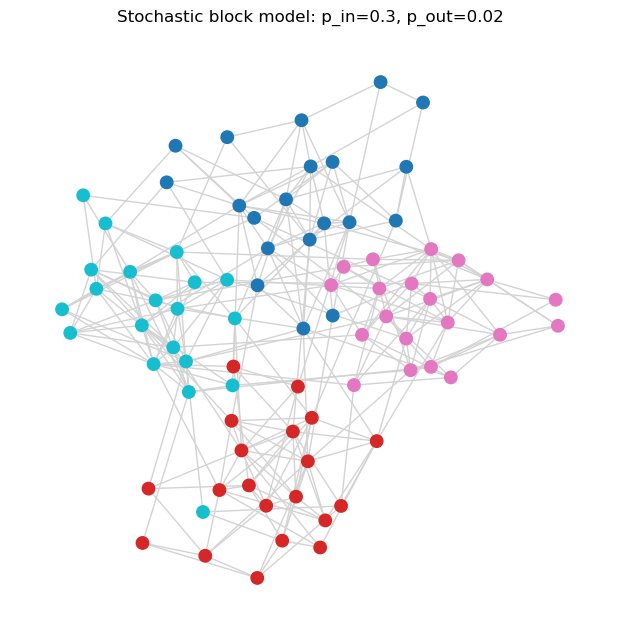

In [17]:
num_communities = 4
nodes_per_community = 20
p_in = 0.3 # prob. połączenia wewnątrz społeczności
p_out = 0.02 # prob. połączenia między społecznościami

sizes = [nodes_per_community] * num_communities

# matrix p_{ij}
# jeśli i = j bierzemy p_in, jeśli i != j to p_out
probs = [
    [p_in if i == j else p_out for j in range(num_communities)]
    for i in range(num_communities)
]


G = nx.stochastic_block_model(sizes, probs, seed=0)

node_colors = []
for comm_id, size in enumerate(sizes):
    node_colors.extend([comm_id] * size)


plt.figure(figsize=(6, 6))
pos = nx.spring_layout(G, seed=0)
nx.draw(
    G,
    pos,
    node_color=node_colors,
    cmap=plt.cm.tab10,
    node_size=80,
    with_labels=False,
    edge_color="lightgray",
)
plt.title(f"Stochastic block model: p_in={p_in}, p_out={p_out}")
plt.axis("off")
plt.show()

Gdy **p_in** rośnie, węzły w ramach tej samej społeczności łączą się częściej, więc grupy stają się wyraźniejsze i bardziej zbite. Gdy **p_out** rośnie, pojawia się więcej połączeń między społecznościami i granice między nimi zaczynają się zacierać. Jeśli p_out jest zbliżone do p_in, struktura praktycznie przestaje pokazywać podziały na grupy. Gdy p_in jest zbyt małe, nawet pojedyncze społeczności mogą się rozpadać na luźne fragmenty.


#### P5.4 Draw a graph of the averaged coefficient of clustering of the WS network against its parameter p. [1.5P]

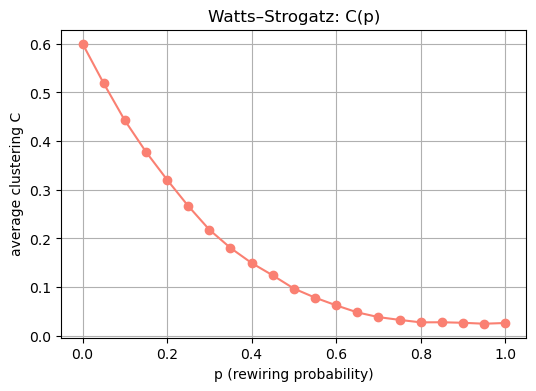

In [6]:
# DO POPRAWY - ZAIMPLEMENTOWAĆ

n = 200 # nodes
k = 6 # każdy węzeł połączony z k najbliższymi sąsiadami na pierścieniu
repeats = 20 # ile realizacji dla danego p uśredniamy

# wartości p od 0 do 1
# p=0 idealne uporzdkowanie
# p=1 rośnie losowość
p_values = np.linspace(0, 1, 21)   
C_values = []

for p in p_values:
    Cs = []
    for _ in range(repeats):
        G = nx.watts_strogatz_graph(n, k, p) # ZAIMPLEMENTUJ!!!!
        Cs.append(nx.average_clustering(G))
    C_values.append(np.mean(Cs))

plt.figure(figsize=(6,4))
plt.plot(p_values, C_values, marker="o",color="salmon")
plt.xlabel("p (rewiring probability)")
plt.ylabel("average clustering C")
plt.title("Watts–Strogatz: C(p)")
plt.grid(True)
plt.show()

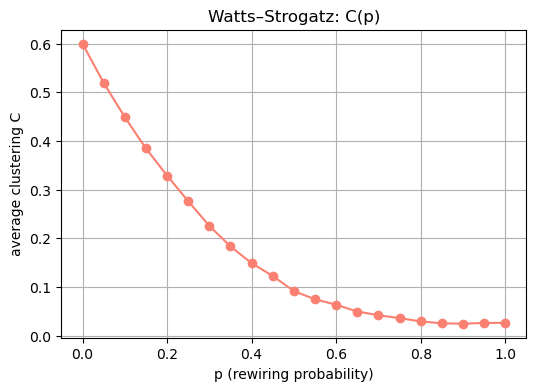

In [13]:
## POPRAWA

# średni współczynnik klastrowania 
def node_clustering(G, v):
    neighbors = list(G.neighbors(v))
    k = len(neighbors)
    if k < 2:
        return 0.0

    possible_edges = k * (k - 1) / 2
    existing_edges = 0

    for i in range(k):
        for j in range(i + 1, k):
            u = neighbors[i]
            w = neighbors[j]
            if G.has_edge(u, w):
                existing_edges += 1

    return existing_edges / possible_edges


def average_clustering_manual(G):
    n = G.number_of_nodes()
    return sum(node_clustering(G, v) for v in G.nodes()) / n


# implementacja watts_strogatz_graph

def watts_strogatz_manual(n, k, p, seed=None):
    """
    n - liczba węzłów
    k - każdy węzeł połączony z k najbliższymi sąsiadami na pierścieniu (k parzyste)
    p - prawdopodobieństwo przełączenia (rewiring) każdej krawędzi
    """
   
    assert k % 2 == 0, "k musi być parzyste"
    
    rng = np.random.default_rng(seed)

    G = nx.Graph()
    G.add_nodes_from(range(n))

    # sieć regularna na pierścieniu
    half_k = k // 2
    for i in range(n):
        for step in range(1, half_k + 1):
            j = (i + step) % n # sąsiad na pierścieniu
            G.add_edge(i, j)

    # przełączanie krawędzi z prawdopodobieństwem p
    for i in range(n):
        for step in range(1, half_k + 1):
            j = (i + step) % n
            # patrzymy tylko na krawędzie w "jedną stronę"
            if not G.has_edge(i, j):
                continue

            if rng.random() < p:
                # usuwamy starą krawędź
                G.remove_edge(i, j)

                # losujemy nowego sąsiada
                possible_targets = set(range(n))
                possible_targets.discard(i) # bez pętli
                possible_targets.difference_update(G.neighbors(i)) # bez wielokrotnych krawędzi

                if not possible_targets:
                    # jeśli nie ma gdzie podłączyć, przywracamy starą krawędź
                    G.add_edge(i, j)
                    continue

                new_j = rng.choice(list(possible_targets))
                G.add_edge(i, new_j)

    return G


####################################

n = 200 # nodes
k = 6 # każdy węzeł połączony z k najbliższymi sąsiadami na pierścieniu
repeats = 20 # ile realizacji dla danego p uśredniamy

# wartości p od 0 do 1
# p=0 idealne uporzdkowanie
# p=1 rośnie losowość
p_values = np.linspace(0, 1, 21)   
C_values = []

for p in p_values:
    Cs = []
    for _ in range(repeats):
        G = watts_strogatz_manual(n, k, p, seed=None)
        Cs.append(average_clustering_manual(G))
    C_values.append(np.mean(Cs))

plt.figure(figsize=(6,4))
plt.plot(p_values, C_values, marker="o",color="salmon")
plt.xlabel("p (rewiring probability)")
plt.ylabel("average clustering C")
plt.title("Watts–Strogatz: C(p)")
plt.grid(True)
plt.show()

Sprawdzamy, jak średni współczynnik klasteryzacji zależy od prawdopodobieństwa **p** w modelu Wattsa–Strogatza. Przy **p = 0** sieć jest regularna, więc klasteryzacja jest wysoka. Gdy zwiększamy **p**, kolejne krawędzie zostają przełączone w losowe miejsca, przez co lokalne struktury zanikają i klasteryzacja szybko spada. Dla **p bliskiego 1** sieć staje się prawie losowa i poziom klasteryzacji jest już bardzo niski -> widać płynne przejście od sieci uporządkowanej do losowej

#### P5.5 With (or without) Mathematica solve ER model in the case of G_N,E. [2P]

Exact degree distribution for G_N,E

In [9]:
# DO POPRAWY - dowód na kartce, że hypergeom (i dostałam już tutaj 1 pkt)

N = 100 # nodes
E = 200 # edges

# S - number of possible edges in an undirected simple graph
S = N * (N - 1) // 2 # S = C(N, 2)

# for fixed node:
S1 = N - 1 # number of successes, edges incident to the node
S0 = S - S1 # remaining possible edges (not touching this node)

# possible degrees 0 to N-1
k_vals = np.arange(0, N)


# K - number of selected edges among S1 when drawing E edges from S without replacement
pmf_exact = hypergeom.pmf(k_vals, S, S1, E)

print("Sum of probabilities (should very close to 1):", pmf_exact.sum())

# mean and variance from the exact PMF
mean_exact = np.sum(k_vals * pmf_exact)
var_exact  = np.sum((k_vals - mean_exact)**2 * pmf_exact)

print("Exact mean degree =", mean_exact)
print("Theoretical value 2E/N =", 2 * E / N)
print("Variance (from PMF) =", var_exact)


Sum of probabilities (should very close to 1): 0.9999999999999993
Exact mean degree = 3.9999999999999973
Theoretical value 2E/N = 4.0
Variance (from PMF) = 3.7623762376237586


Comparison with Binomial and Poisson approximations

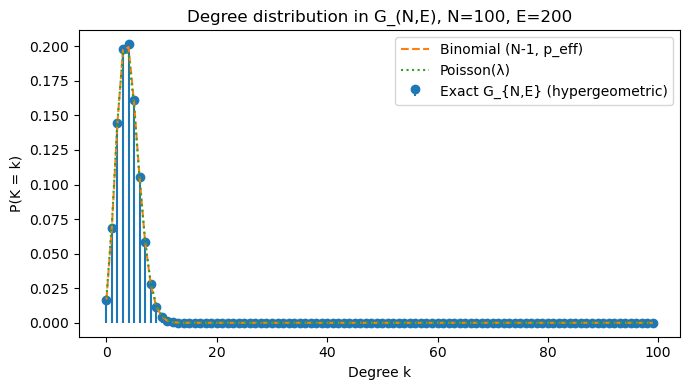

In [10]:
#  probability for the Binomial approximation
p_eff = E / S # probability that a given edge is selected

lam = (N - 1) * p_eff # Poisson parameter mean degree

# prob. mass functions
pmf_binom = binom.pmf(k_vals, N - 1, p_eff)
pmf_poiss = poisson.pmf(k_vals, lam)



plt.figure(figsize=(7, 4))

# exact pmfs 
plt.stem(k_vals, pmf_exact, linefmt='C0-', markerfmt='C0o',
         basefmt=" ", label="Exact G_{N,E} (hypergeometric)")

# approximated plots - display code generated with help of chatGPT due to repeating errors
plt.plot(k_vals, pmf_binom, 'C1--', label="Binomial (N-1, p_eff)")
plt.plot(k_vals, pmf_poiss, 'C2:',  label="Poisson(λ)")

plt.xlabel("Degree k")
plt.ylabel("P(K = k)")
plt.title(f"Degree distribution in G_(N,E), N={N}, E={E}")
plt.legend()
plt.tight_layout()
plt.show()


#### P5.6 Implement configuration model and test when the procedure converge. [2.5P]

First time the running mean changes less than tol = 0.001 is at sample: 5


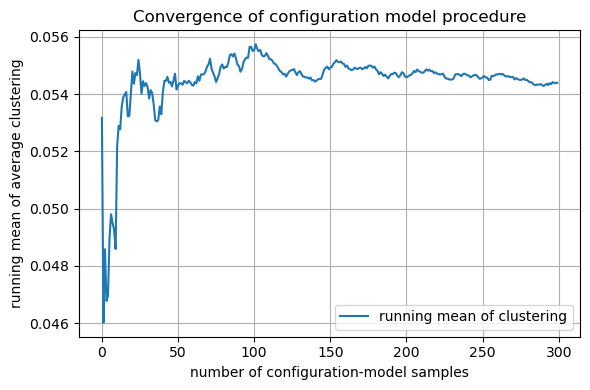

In [11]:
# random degrees between 1 and 10 for N nodes
N = 100
rng = np.random.default_rng(0)
degree_sequence = rng.integers(1, 11, size=N)

# sum of degrees must be even in graph
if degree_sequence.sum() % 2 == 1:
    degree_sequence[0] += 1


def sample_configuration_graph(deg_seq):

    # configuration_model returns a multigraph (self-loops + parallel edges)
    G_multi = nx.configuration_model(deg_seq, seed=None)

    # convert to simple graph merge parallel edges
    G = nx.Graph(G_multi)

    # remove self-loops
    G.remove_edges_from(nx.selfloop_edges(G))

    return G


# Monte Carlo
num_samples = 300 # number of configuration-model graphs
clustering_vals = [] # store average clustering from each sample

# num_samples różnych losowych grafów, za każdym razem inne połączenia, ale te same stopnie
for _ in range(num_samples):
    G = sample_configuration_graph(degree_sequence)
    C = nx.average_clustering(G) # observable: average clustering coefficient
    clustering_vals.append(C)

clustering_vals = np.array(clustering_vals)



running_mean = np.cumsum(clustering_vals) / np.arange(1, num_samples + 1)



tol = 1e-3 # tolerance for change in running mean

# od którego momentu bieżąca średnia prawie się już nie zmienia

converged_at = None
for i in range(1, num_samples):
    # check when the change in running mean becomes smaller than tol
    if abs(running_mean[i] - running_mean[i - 1]) < tol:
        converged_at = i + 1  # +1 because index starts from 0
        break

print("First time the running mean changes less than tol =", tol,
      "is at sample:", converged_at)


plt.figure(figsize=(6, 4))
plt.plot(running_mean, label="running mean of clustering")
plt.xlabel("number of configuration-model samples")
plt.ylabel("running mean of average clustering")
plt.title("Convergence of configuration model procedure")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#### P5.7 Compute partition function and distribution of the network with given hamiltonian for the case with fixed number of edges. [2.5P]

In [3]:
# tutaj odpuszczam i 0
def analytic_partition_function(N, E, beta=1.0, theta=0.0):
    """
    [Description of function added with chat GPT]
    Analytic partition function Z_{N,E} for the microcanonical ER ensemble
    with fixed number of edges E and Hamiltonian H(G) = theta * E(G).
    
    N : int
        Number of nodes.
    E : int
        Fixed number of edges.
    beta : float
        Inverse temperature.
    theta : float
        Parameter in the Hamiltonian.
        
    Returns
    Z : float
        Partition function.
    Omega : int
        Number of microstates (graphs) with N nodes and E edges.
        (ile istnieje wszystkich możliwych grafów na N węzłach, które mają dokładnie E krawędzi)
    """
    # number of all possible undirected edges
    S = N * (N - 1) // 2
    
    # number of graphs with exactly E edges
    Omega = math.comb(S, E)
    
    # partition function: constant energy for all allowed graphs
    Z = math.exp(-beta * theta * E) * Omega
    return Z, Omega


# example
# small N to brute-force check Omega
N = 5
E = 4

Z, Omega = analytic_partition_function(N, E, beta=1.0, theta=0.5)
print(f"Analytic Omega(N={N}, E={E}) =", Omega)
print("Analytic partition function Z =", Z)


# check
# brute-force check only works for very small N
# list of all possible edges
nodes = list(range(N))
possible_edges = list(itertools.combinations(nodes, 2)) # S edges

# numerate all subsets of edges of size E [with help of chatGPT]
count = 0
for edges_subset in itertools.combinations(possible_edges, E):
    count += 1  # each subset corresponds to one simple graph

print("Brute-force count of graphs with E edges =", count)
print("Counts match:", count == Omega)


Analytic Omega(N=5, E=4) = 210
Analytic partition function Z = 28.42040947968867
Brute-force count of graphs with E edges = 210
Counts match: True
